# Extract data from output files
### Analyze the output from a single LBANN run
March 9, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import subprocess as sp
import os
import glob
import sys

from scipy import fftpack


In [2]:
sys.path.append('/global/u1/v/vpa/project/jpt_notebooks/Cosmology/Cosmo_GAN/LBANN/lbann_cosmogan/3_analysis/')
from modules_image_analysis import *

[NbConvertApp] Converting notebook modules_image_analysis.ipynb to script
[NbConvertApp] Writing 7852 bytes to modules_image_analysis.py


In [3]:
### Transformation functions for image pixel values
def f_transform(x):
    return 2.*x/(x + 4.) - 1.

def f_invtransform(s):
    return 4.*(1. + s)/(1. - s)

In [4]:
def f_get_samples(images_dict,key):
    '''
    Extract array of samples from the dictionary: images_dict
    Handles the separate cases of _gen images that are of size (:,)
    '''
    
    keys=['train_gen','train_input','val_gen','val_input']
    assert key in keys,"Given key %s is not the the list of keys %s"%(key,keys)
    
    lst=images_dict[key]
    if key.endswith('input'):
        size=np.int(np.sqrt(lst[0].shape[-1])) ### Extract size of images (=128)
        samples=np.array([ii[0,:].reshape(size,size) for ii in lst])
    else : 
        samples=np.array([ii[0,0,:,:] for ii in lst])
    
    return samples

## Extract image data 

In [5]:
fldr_name='20200316_112134_exagan'
# fldr_name='20200318_131818_exagan'
main_dir='/global/cfs/cdirs/m3363/vayyar/cosmogan_data/results_data/{0}/dump_outs/'.format(fldr_name)

print(main_dir)

/global/cfs/cdirs/m3363/vayyar/cosmogan_data/results_data/20200316_112134_exagan/dump_outs/


In [6]:
## Get images files and .npy arrays for each image in dump_outs folder
files_dict,images_dict={},{}
keys=['train_gen','train_input','val_gen','val_input']
file_strg_lst=['model0-training*-gen_img*-output0.npy','model0-training*-inp_img*-output0.npy','model0-validation*-gen_img*-output0.npy','model0-validation*-inp_img*-output0.npy']
for key,file_strg in zip(keys,file_strg_lst):
    files_dict[key]=np.array(glob.glob(main_dir+file_strg))
    images_dict[key]=[np.load(fle) for fle in files_dict[key]] 
    ### Deliberately kept as as list because some of the input arrays have different dimensions, causing creation of array of arrays in some cases


## Extract samples 

In [7]:
### Available options : keys=['train_gen','train_input','val_gen','val_input']
samples1=f_get_samples(images_dict,'train_input')
print(samples1.shape)
samples2=f_get_samples(images_dict,'val_input')
print(samples2.shape)

(240, 128, 128)
(27, 128, 128)


## Compare images

In [8]:
### Plot the transformation functions

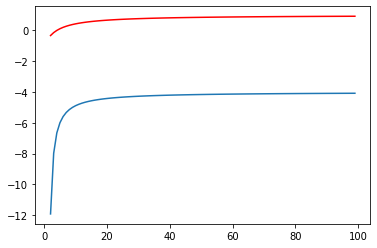

In [9]:
x=np.arange(2.01,100)
y=f_transform(x)
z=f_invtransform(x)
plt.figure()
plt.plot(x,y,color='r')
plt.plot(x,z)

array([2.92633934e-02, 4.67750758e-05, 1.49595997e-05, 6.00490704e-06,
       4.00327405e-06, 2.73908102e-06, 1.05349270e-06, 9.48143004e-07,
       3.16047951e-07, 5.26746585e-07, 5.26746113e-07, 4.21397268e-07,
       1.05349223e-07, 2.10698634e-07, 1.05349223e-07, 0.00000000e+00,
       2.10698823e-07, 0.00000000e+00, 1.05349223e-07, 1.05349411e-07,
       0.00000000e+00, 1.05349223e-07, 0.00000000e+00, 0.00000000e+00,
       1.05349223e-07])

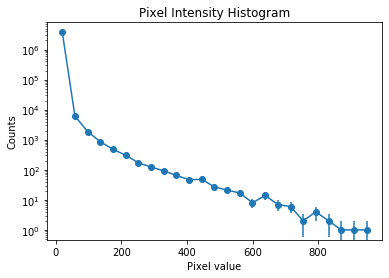

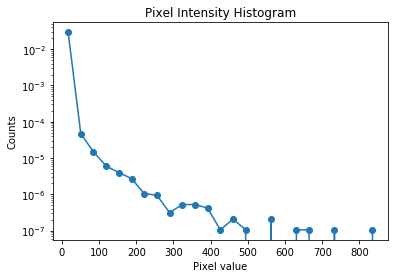

In [10]:
f_pixel_intensity(samples1[:-10],normalize=False)
# f_pixel_intensity(f_invtransform(samples1[:-10]))
f_pixel_intensity(samples2[:-10])

0.00047294186861777547

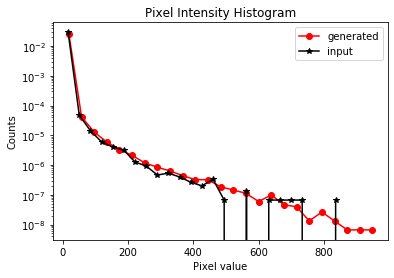

In [15]:
f_compare_pixel_intensity(samples1,samples2,label1='generated',label2='input',normalize=True)

(240, 128, 128) (27, 128, 128) (240, 88) (27, 88)
(88,) (88,)


2702172.6447776034

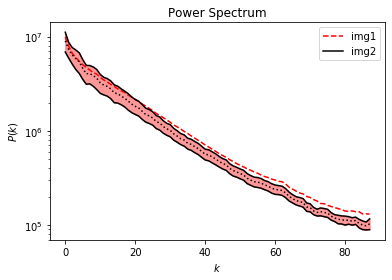

In [12]:
f_compare_spectrum(samples1,samples2)

## Inspect individual sample arrays

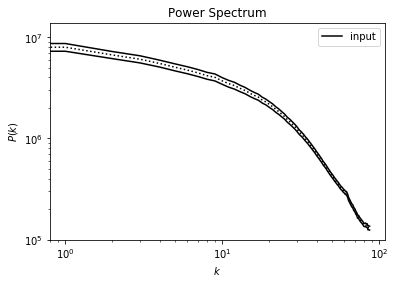

In [13]:
f_compute_spectrum(samples1)

In [14]:
# f_plot_grid(samples1[:8],8)
# f_plot_grid(samples2[:8],8)
